In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models  import Sequential
from keras.layers import Input, Dense
from keras.optimizers import Adam, SGD, RMSprop
import matplotlib.pyplot as plt
from keras.models import load_model

In [1]:
df=pd.read_csv("Distance_file_1.csv")
df

,A1,B1,C1,A2,B2,C2,Distance
0,0.85,1.86,9.06,-5.04,-0.96,6.03,5.75
1,-9.80,-4.07,7.38,-6.07,-4.03,2.68,0.41
2,2.79,1.63,-2.08,-3.93,1.40,-8.32,3.32
3,-5.86,0.05,6.30,-3.15,9.76,2.03,0.76
4,0.47,0.93,1.99,4.67,-5.29,-5.50,4.12
5,7.32,-7.89,0.50,3.99,4.53,-4.48,0.68
6,-3.28,-2.96,-0.29,0.95,-7.04,-7.88,0.49
7,7.43,6.61,-1.29,8.44,9.15,4.83,0.52
8,8.65,7.98,3.75,-8.18,-4.98,5.12,2.57
9,-0.75,-2.51,-2.70,-2.42,7.66,1.43,3.11


In [5]:
X = df[['A1','B1','C1','A2','B2','C2']]
y = df['Distance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

model_1 = Sequential([
    Dense(6, input_shape=(6,), activation="relu"),
    Dense(3, activation='relu'),
    Dense(1,activation='linear')
])

In [6]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 42        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [7]:
model_1.compile(loss='mean_squared_error', optimizer='adam')
run_hist_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 28ms/step - loss: 12.6284 - val_loss: 11.8109
Epoch 2/100
24/24 [==============================] - 0s 7ms/step - loss: 9.5128 - val_loss: 9.6019
Epoch 3/100
24/24 [==============================] - 0s 7ms/step - loss: 7.7300 - val_loss: 8.3100
Epoch 4/100
24/24 [==============================] - 0s 9ms/step - loss: 6.6526 - val_loss: 7.5367
Epoch 5/100
24/24 [==============================] - 0s 6ms/step - loss: 5.9466 - val_loss: 6.9996
Epoch 6/100
24/24 [==============================] - 0s 7ms/step - loss: 5.4189 - val_loss: 6.5957
Epoch 7/100
24/24 [==============================] - 0s 7ms/step - loss: 5.0248 - val_loss: 6.2578
Epoch 8/100
24/24 [==============================] - 0s 7ms/step - loss: 4.7053 - val_loss: 6.0064
Epoch 9/100
24/24 [==============================] - 0s 7ms/step - loss: 4.4690 - val_loss: 5.7768
Epoch 10/100
24/24 [==============================] - 0s 8ms/step - loss: 4.2695 - val_loss: 5.5827
Epoch 

Epoch 83/100
24/24 [==============================] - 0s 7ms/step - loss: 1.4860 - val_loss: 2.8203
Epoch 84/100
24/24 [==============================] - 0s 11ms/step - loss: 1.4871 - val_loss: 2.8190
Epoch 85/100
24/24 [==============================] - 0s 7ms/step - loss: 1.4747 - val_loss: 2.8159
Epoch 86/100
24/24 [==============================] - 0s 6ms/step - loss: 1.4749 - val_loss: 2.8149
Epoch 87/100
24/24 [==============================] - 0s 10ms/step - loss: 1.4641 - val_loss: 2.7984
Epoch 88/100
24/24 [==============================] - 0s 8ms/step - loss: 1.4615 - val_loss: 2.7956
Epoch 89/100
24/24 [==============================] - 0s 6ms/step - loss: 1.4564 - val_loss: 2.7971
Epoch 90/100
24/24 [==============================] - 0s 9ms/step - loss: 1.4528 - val_loss: 2.7912
Epoch 91/100
24/24 [==============================] - 0s 8ms/step - loss: 1.4462 - val_loss: 2.7875
Epoch 92/100
24/24 [==============================] - 0s 7ms/step - loss: 1.4444 - val_loss: 2.780

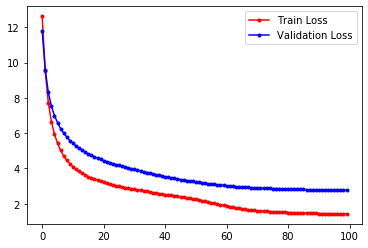

In [9]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [10]:
model_1.save('NN_model_1.h5')

In [14]:
import pandas as pd
A1=[]
B1=[]
C1=[]
A2=[]
B2=[]
C2=[]
distance=[]

def Distance(a1,b1,c1,a2,b2,c2):
    A1.append(a1)
    B1.append(b1)
    C1.append(c1)
    A2.append(a2)
    B2.append(b2)
    C2.append(c2)


    Data = pd.DataFrame()
    Data['A1'] = A1
    Data['B1'] = B1
    Data['C1'] = C1
    Data['A2'] = A2
    Data['B2'] = B2
    Data['C2'] = C2

    saved_model = load_model('NN_model_1.h5')
    test_result =saved_model.predict(Data)
    print("Distance between 2 line=",test_result)
    distance.append(test_result)
    Data['Distance'] = distance
    print(Data)

In [15]:
Distance(2.79,1.63,-2.08,-3.93,1.40,-8.32)

Distance between 2 line= [[2.459477]]
     A1    B1    C1    A2   B2    C2      Distance
0  2.79  1.63 -2.08 -3.93  1.4 -8.32  [[2.459477]]
